In [1]:


import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes
from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import os
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
from matplotlib.patches import Rectangle
#%matplotlib widget

astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16


['CMZ_HCO+_Sh_J1_0' 'CMZ_HCN_Sh J1-0' 'CMZ_H13CN_Sh J1-0' 'CMZ_CO 3-2_Abs'
 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs'] ['HCO 1-0_Abs', 'HCN_1_0_Abs_CMZ', 'H13CN_1_0_Abs_CMZ', '6', 'CO 3-2_Abs']
CMZ_CO 3-2_AbsRadii CO 3-2_AbsRadii
(16442,) (16442,)


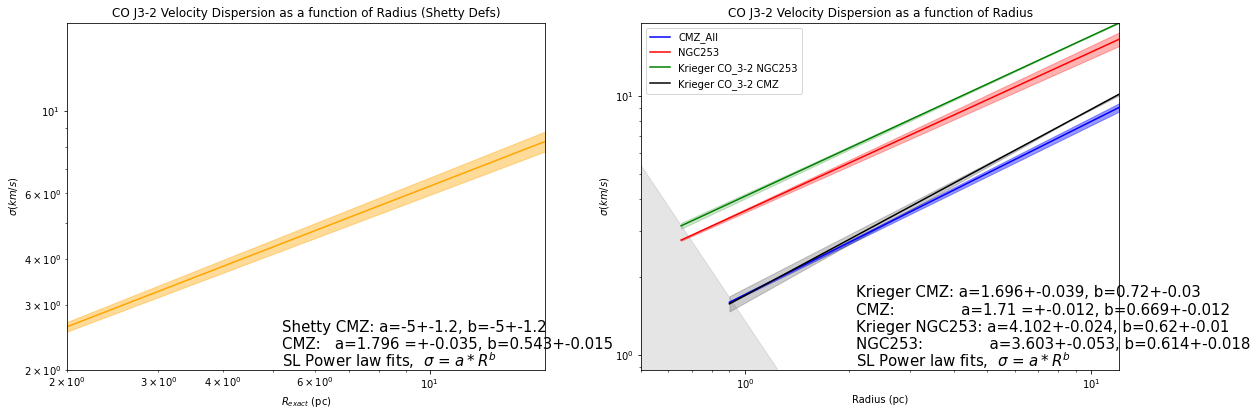

In [2]:

Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO J3-2"]


NGCNames = np.load("Names.npy")

NGCNamesMols = [NGCNames[0],NGCNames[1],NGCNames[2],NGCNames[5],NGCNames[3]]
print(Names,NGCNamesMols)



Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(4,5):
    #make minimum space line
    resses = [4.3,3,5,3,3]
    
    pixel_res=np.array(resses)/5    
    spe_resses = [2.5,2.5,2.5,2.5,2.5]
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.01,5,100)
    
    for t in range(100):
        try:
            #Nminsigs.append((np.roots([rs[t]**2,-2.5*3*(resses[i]/5/2)**2])[0])) #Solve for the minimum sigma value for a given radius
            Nminsigs.append((np.roots([rs[t]**2,-(spe_resses[i])/2*3*pixel_res[i]**2])[0])) #Solve for the minimum sigma value for a given radius
        except:
            
            Nminsigs.append(-1)
        
        
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    #Shetty leaves/branches
    radsBaseSh=[[],[]]
    radsBaseSh[0] = np.genfromtxt(rname+"Sh_Leaves")*10**6#pc
    radsBaseSh[1] = np.genfromtxt(rname+"Sh_Branches")*10**6#pc
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    #Shetty leaves/branches
    sigsBaseSh=[[],[]]
    sigsBaseSh[0] = np.genfromtxt(sname+"Sh_Leaves")#km/s
    sigsBaseSh[1] = np.genfromtxt(sname+"Sh_Branches")
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    #Shetty's method
    radsSh,sigsSh=np.concatenate((radsBaseSh[0],radsBaseSh[1])), np.concatenate((sigsBaseSh[0],sigsBaseSh[1]))
    
    #print(radsNGCBase,sigsNGCBase)
    #LuminBase = np.load(Names[i]+"_Luminosities.npy",allow_pickle=True)
    
    LuminBase=[[],[]]
    LuminBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    Lumin = np.concatenate((LuminBase[0],LuminBase[1]))#Take up less ram
    
    
    LuminNGCBase=[[],[]]
    LuminNGCBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminNGCBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    
    LuminNGC = np.concatenate((LuminNGCBase[0],LuminNGCBase[1]))#Take up less ram
    
    
    
    ColumnBase=[[],[]]
    ColumnBase[0] = np.genfromtxt(Names[i]+"_Column"+"_Leaves")#km/s
    ColumnBase[1] = np.genfromtxt(Names[i]+"_Column"+"_Branches")
    
    Column = np.concatenate((ColumnBase[0],ColumnBase[1]))#Take up less ram
    
    ColumnNGCBase=[[],[]]
    ColumnNGCBase[0] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Leaves")#km/s
    ColumnNGCBase[1] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Branches")
        
    ColumnNGC = np.concatenate((ColumnNGCBase[0],ColumnNGCBase[1]))#Take up less ram
    
    
    Flux = np.genfromtxt(Names[i]+"Flux_Dense")#Take up less ram
    FluxNGC = np.genfromtxt(NGCNamesMols[i]+"Flux_Dense")#Take up less ram
    
    RGPFF = np.genfromtxt(Names[i]+"Rad_For_Flux")#Take up less ram
    RGPFFNGC = np.genfromtxt(NGCNamesMols[i]+"Rad_For_Flux")#Take up less ram

    

    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    print(np.shape(rads),np.shape(sigs))
    (poptT, pcovT) =(curve_fit(func, rads,sigs))
    #Sh
    (poptTSh, pcovTSh) =(curve_fit(func, radsSh,sigsSh))

    (NpoptT, NpcovT) = (curve_fit(func, radsNGC,sigsNGC ))

    
    
    
    axNM = pylab.subplot(8,6, i+16)
    axSh = pylab.subplot(8,6, i+15)

    #cmz
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    #sh
    xsSh=np.linspace(np.nanmin(radsSh),np.nanmax(radsSh),50)
    #ngc253
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    
    er_r=1
    ysT=func(xs,poptT[0],poptT[1])
    yusT  = func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsT  = func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaT = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    xpaFT = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
    #Shettys method
    er_r=1
    ysTSh=func(xsSh,poptTSh[0],poptTSh[1])
    yusTSh  = func(xsSh, poptTSh[0]+np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]+np.sqrt(pcovTSh[1][1])*er_r)
    ylsTSh  = func(xsSh, poptTSh[0]-np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]-np.sqrt(pcovTSh[1][1])*er_r)
    xpaTSh = axSh.plot(xsSh,ysTSh,c='Orange',label='CMZ_All')
    xpaFTSh = axSh.fill_between(xsSh,ylsTSh,yusTSh,color="Orange",alpha=.4)

    #ngc253
    NysT=func(Nxs,NpoptT[0],NpoptT[1])    
    NyusT  = func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsT  = func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC253')
    
    
    
    
    

    
    
    
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    
    
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .1
    
       
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NCI32 = func(xs,NicoCOCoef(NicoCO_32,NicoCO32),NicoCO32)
    NCIU32 = func(xs,NicoCOCoef(NicoCO_32+NicoAErr(NicoCO_32Err,NicoCO32,NicoCOErr32)*er_r,NicoCO32+NicoCOErr32*er_r),NicoCO32+ NicoCOErr32*er_r)
    NCIL32 = func(xs,NicoCOCoef(NicoCO_32-NicoAErr(NicoCO_32Err,NicoCO32,NicoCOErr32)*er_r,NicoCO32-NicoCOErr32*er_r),NicoCO32- NicoCOErr32*er_r)
    
    
    
    NNicoNM32 = axNM.plot(Nxs,NNI32,c='green',label='Krieger CO_3-2 NGC253')
    NNicoFill32 = axNM.fill_between(Nxs,NNIL32,NNIU32,color="green",alpha=.2)
    
    NicoNM32 = axNM.plot(xs,NCI32,c='black',label='Krieger CO_3-2 CMZ')
    NicoFill32 = axNM.fill_between(xs,NCIL32,NCIU32,color="black",alpha=.2)
    
    #Shetty's methods"
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axSh.plot(Nxs,SP,c='Yellow',label='Shetty Value CMZ (CO_3_2)')
    ShettyFill = axSh.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    
    
    #Minimum velocity line
    MinVel=axNM.fill_between(line,Nminsigs,zeros,color="Gray",alpha=.2)

    
    
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel(r'$\sigma   (km/s)$')
    axNM.set_yscale('log')
    axNM.set_xscale('log')
    axNM.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axNM.set_xlim(.5,np.nanmax(rads)*1)
    axNM.set_ylim(np.nanmin(sigs)*4,np.nanmax(sigsNGC)*.8)
    NstA= ("NGC253:              a="+str(round(NpoptT[0],3))+"+-" + str(round(np.sqrt(NpcovT[0][0]),3)) +", b="+str(round(NpoptT[1],3))+"+-" + str(round(np.sqrt(NpcovT[1][1]),3)) )
    NNstA= ("Krieger NGC253: a="+str(round(NicoCOCoef(NNicoCO_32,NNicoCO32),3))+"+-" + str(round(NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32),3)) +", b="+str(round(NNicoCO32,3))+"+-" + str(round((NNicoCOErr32),3)) )
    stA= ("CMZ:              a="+str(round(poptT[0],3))+" =+-" + str(round(np.sqrt(pcovT[0][0]),3)) +", b="+str(round(poptT[1],3))+"+-" + str(round(np.sqrt(pcovT[1][1]),3)) )
    NCstA= ("Krieger CMZ: a="+str(round(NicoCOCoef(NicoCO_32,NicoCO32),3))+"+-" + str(round(NicoAErr(NicoCO_32Err,NicoCO32,NicoCOErr32),3)) +", b="+str(round(NicoCO32,3))+"+-" + str(round((NicoCOErr32),3)) )
    axNM.annotate(s=NstA,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction") 
    axNM.annotate(s=NNstA,fontsize=15,xy=(0.45,0.11),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=15,xy=(0.45,0.16),xycoords="axes fraction") 
    axNM.annotate(s=NCstA,fontsize=15,xy=(0.45,0.21),xycoords="axes fraction") 
    axNM.legend(loc='upper left')
    axNM.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    #Shetty
    stASh= ("CMZ:   a="+str(round(poptTSh[0],3))+" =+-" + str(round(np.sqrt(pcovTSh[0][0]),3)) +", b="+str(round(poptTSh[1],3))+"+-" + str(round(np.sqrt(pcovTSh[1][1]),3)) )
    ShstASh= ("Shetty CMZ: a="+str(round(ShettyCoefs[i],3))+"+-" + str(round(ShettyCoefsErrs,3)) +", b="+str(round(Shetty_Exp[i],3))+"+-" + str(round((ShettyCoefsErrs),3)) )
    axSh.set_xlabel(r'$R_{exact}$ (pc)')
    axSh.set_ylabel(r'$\sigma   (km/s)$')
    axSh.set_yscale('log')
    axSh.set_xscale('log')
    axSh.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")
    axSh.annotate(s=stASh,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction") 
    axSh.annotate(s=ShstASh,fontsize=15,xy=(0.45,0.11),xycoords="axes fraction") 
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axSh.set_xlim(2,np.nanmax(radsSh)*1)
    axSh.set_ylim(2,np.nanmax(sigsSh)*.8)
    axSh.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"))
    
    
    

    
    
    
fig.savefig(bbox_inches='tight',fname="Benchmarking Plots.pdf")
    

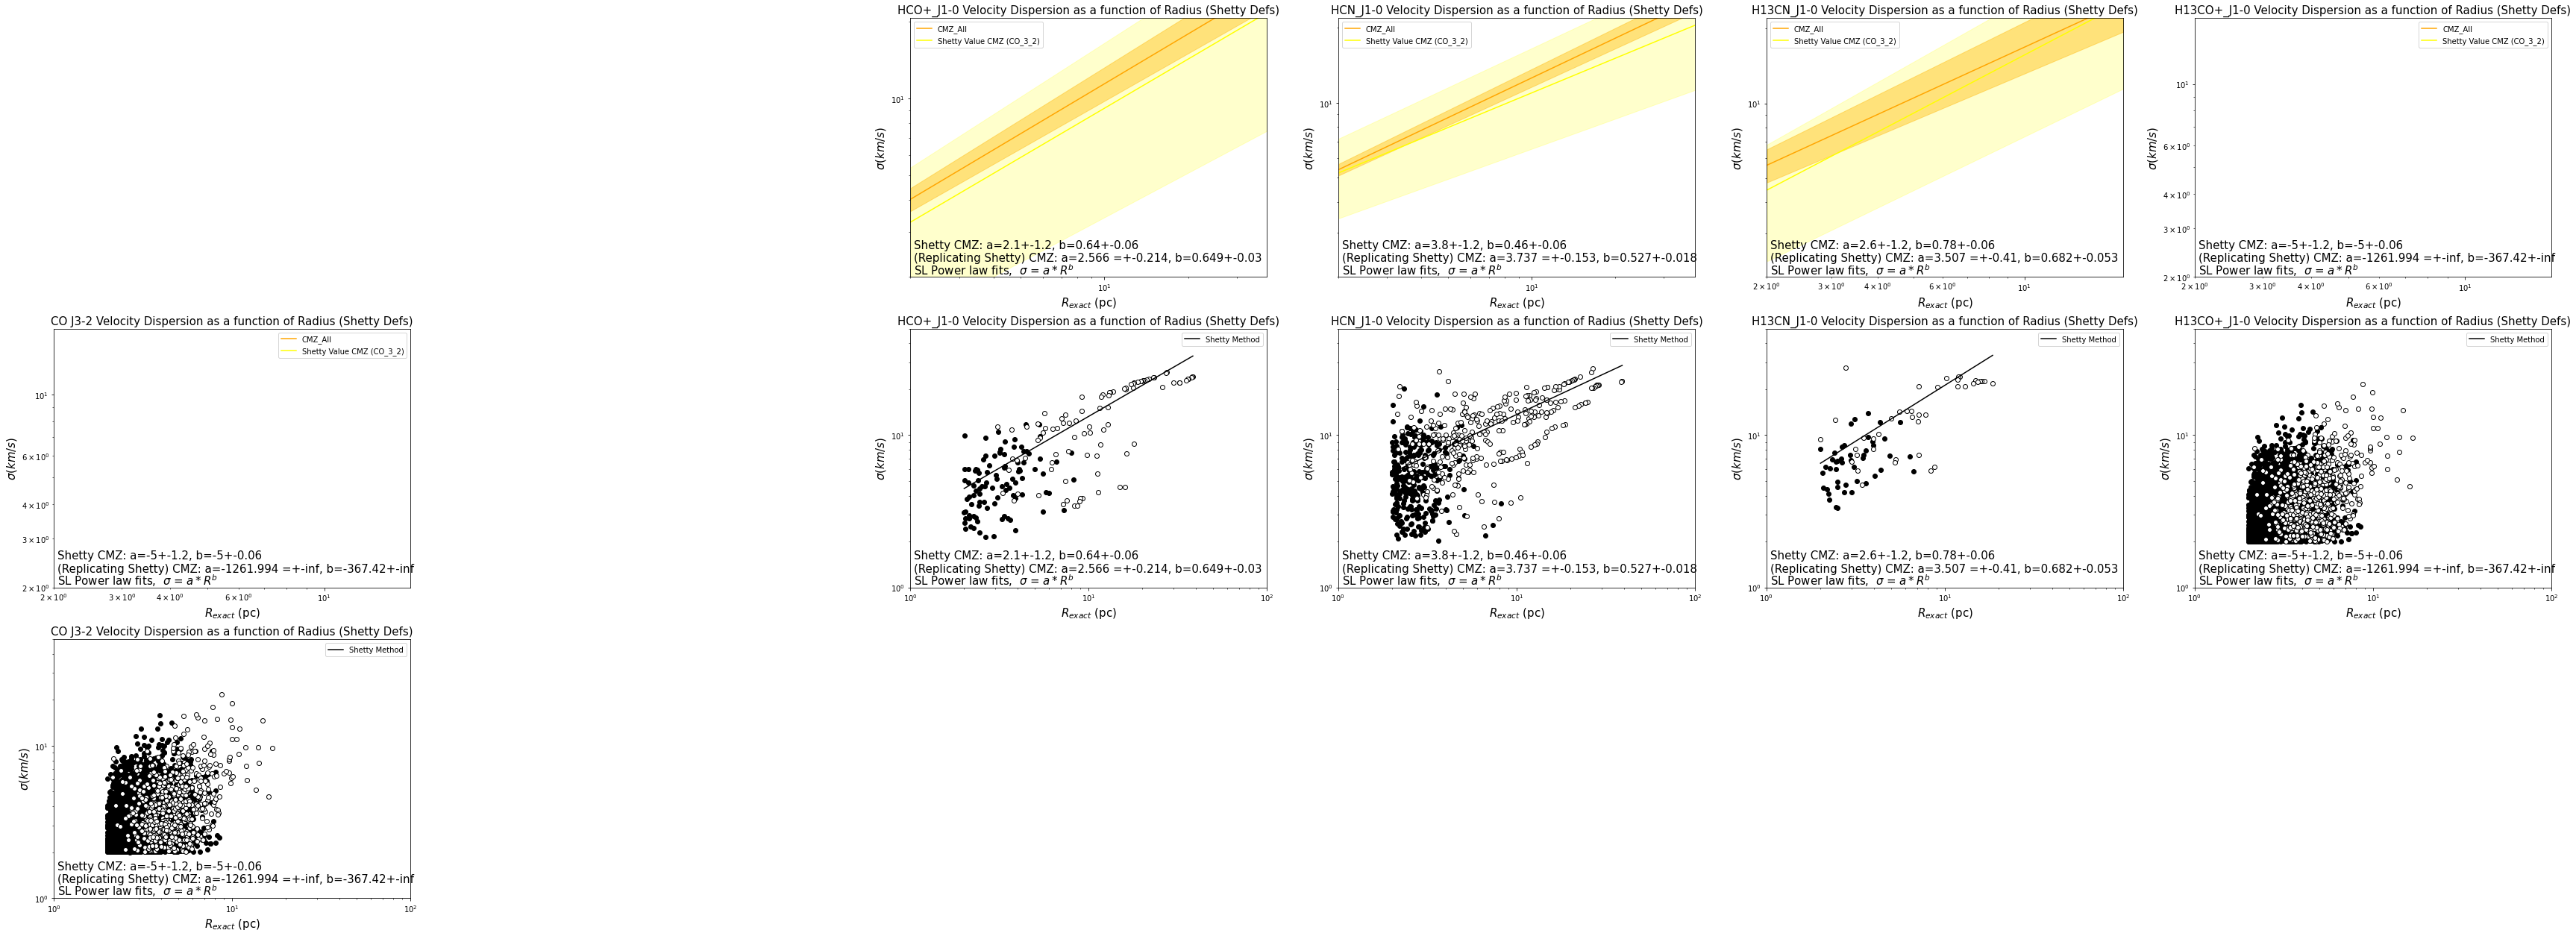

In [9]:
#Shetty comparison
Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO J3-2"]




#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(0,5):

    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"

    
    #Shetty leaves/branches
    radsBaseSh=[[],[]]
    radsBaseSh[0] = np.genfromtxt(rname+"Sh_Leaves")*10**6#pc
    radsBaseSh[1] = np.genfromtxt(rname+"Sh_Branches")*10**6#pc

    #Shetty leaves/branches
    sigsBaseSh=[[],[]]
    sigsBaseSh[0] = np.genfromtxt(sname+"Sh_Leaves")#km/s
    sigsBaseSh[1] = np.genfromtxt(sname+"Sh_Branches")
   
    #Shetty's method
    radsSh,sigsSh=np.concatenate((radsBaseSh[0],radsBaseSh[1])), np.concatenate((sigsBaseSh[0],sigsBaseSh[1]))
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    
    #Sh
    (poptTSh, pcovTSh) =(curve_fit(func, radsSh,sigsSh,p0=[ShettyCoefs[i],Shetty_Exp[i]]))

    

    
    
    
    
    axSh = pylab.subplot(8,6, i+15)
    axSh2 = pylab.subplot(8,6, i+21)

    
    #sh
    xsSh=np.linspace(np.nanmin(radsSh),np.nanmax(radsSh),50)
    
    
    
    #Shettys method
    er_r=1
    ysTSh=func(xsSh,poptTSh[0],poptTSh[1])
    yusTSh  = func(xsSh, poptTSh[0]+np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]+np.sqrt(pcovTSh[1][1])*er_r)
    ylsTSh  = func(xsSh, poptTSh[0]-np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]-np.sqrt(pcovTSh[1][1])*er_r)
    xpaTSh = axSh.plot(xsSh,ysTSh,c='Orange',label='CMZ_All')
    xpaFTSh = axSh.fill_between(xsSh,ylsTSh,yusTSh,color="Orange",alpha=.4)

    
    #Shetty's methods"
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(xsSh,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(xsSh,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(xsSh,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axSh.plot(xsSh,SP,c='Yellow',label='Shetty Value CMZ (CO_3_2)')
    ShettyFill = axSh.fill_between(xsSh,SPL,SPU,color="Yellow",alpha=.2)
    
    
    
    #Shetty (data from my runs)
    #The shetty coefs and mine
    stASh= ("(Replicating Shetty) CMZ: a="+str(round(poptTSh[0],3))+" =+-" + str(round(np.sqrt(pcovTSh[0][0]),3)) +", b="+str(round(poptTSh[1],3))+"+-" + str(round(np.sqrt(pcovTSh[1][1]),3)) )
    ShstASh= ("Shetty CMZ: a="+str(round(ShettyCoefs[i],3))+"+-" + str(round(ShettyCoefsErrs,3)) +", b="+str(round(Shetty_Exp[i],3))+"+-" + str(round((Shetty_exp_errs),3)) )
    
    er_r=1
    
    
    
    xpaFTsh2 = axSh2.plot(xsSh,yusTSh,color="Black",alpha=1,label="Shetty Method")
    
    xpaFTshL = axSh2.scatter(radsBaseSh[0],sigsBaseSh[0],facecolors='Black', edgecolors='Black')
    xpaFTshB = axSh2.scatter(radsBaseSh[1],sigsBaseSh[1],facecolors='White', edgecolors='Black')
    


    axSh2.set_xlabel(r'$R_{exact}$ (pc)',fontsize=15)
    axSh2.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    axSh2.set_yscale('log')
    axSh2.set_xscale('log')
    axSh2.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.01,0.01),xycoords="axes fraction")
    axSh2.annotate(s=stASh,fontsize=15,xy=(0.01,0.06),xycoords="axes fraction") 
    axSh2.annotate(s=ShstASh,fontsize=15,xy=(0.01,0.11),xycoords="axes fraction") 
    
    axSh2.set_xlim(1,100)
    axSh2.set_ylim(1,50)
    axSh2.set_title((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"), fontsize=15)
    axSh2.legend()
    #No data fit compare
    
    axSh.set_xlabel(r'$R_{exact}$ (pc)',fontsize=15)
    axSh.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    axSh.set_yscale('log')
    axSh.set_xscale('log')
    axSh.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.01,0.01),xycoords="axes fraction")
    axSh.annotate(s=stASh,fontsize=15,xy=(0.01,0.06),xycoords="axes fraction") 
    axSh.annotate(s=ShstASh,fontsize=15,xy=(0.01,0.11),xycoords="axes fraction") 
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axSh.set_xlim(2,np.nanmax(radsSh)*1)
    axSh.set_ylim(2,np.nanmax(sigsSh)*.8)
    axSh.set_title((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"), fontsize=15)
    axSh.legend()
    
    

    
    
    
fig.savefig(bbox_inches='tight',fname="Benchmarking Plots.pdf")
    

['HCO 1-0_Abs' 'HCN_1_0_Abs_CMZ' 'H13CN_1_0_Abs_CMZ' 'CO 3-2_Abs_Gauss'
 'CO_3_2_Abs_CMZ' '6' '7' '8' '9' '10' '11'] ['HCO 1-0_Abs', '10', 'HCN_1_0_Abs_CMZ', '11', 'CO 3-2_Abs_Gauss']
CMZ_CO 3-2_AbsRadii CO 3-2_Abs_GaussRadii
[0.6263757485113511, 0.7989539761465165, 1.0190807315215855, 1.2998565228594838, 1.6579912932879934, 2.1147988876276584, 2.6974655133694543, 3.4406676863632986, 4.388635950788214, 5.597787192551644, 7.140082204236446, 9.107308321954157, 11.61654200870721] [5.652111335321708, 4.885381333145178, 5.15642720456865, 5.9738928071280375, 6.875286445514055, 7.8860965293313425, 9.061045132368333, 11.453905581553254, 14.862440832033856, 11.584323382844186, 26.227299622511644, 30.451449884833874, 19.48054997656083]


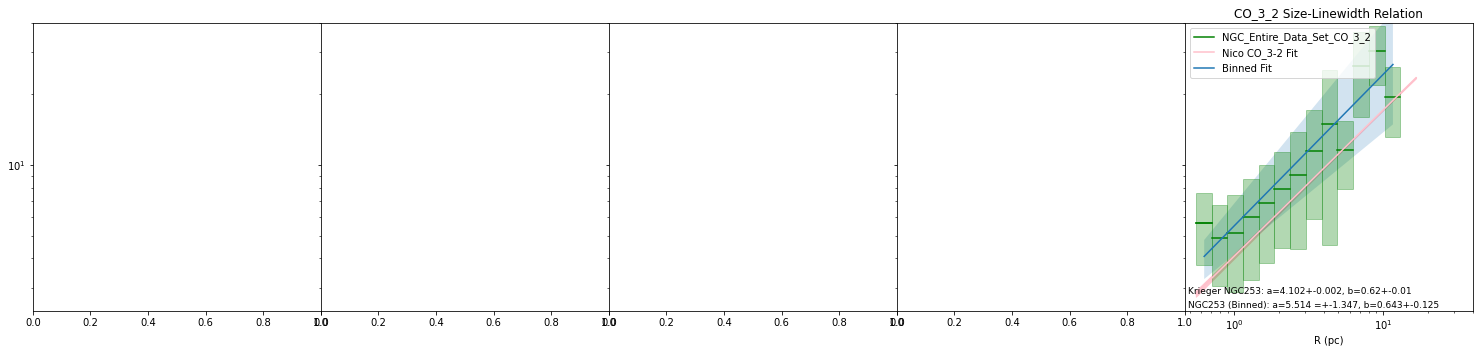

In [3]:



CMZLs = ["HCO+_1_0","HCO+_4_3","HCN_1_0",'HCN_4_3',"CO_3_2"]

Names = np.load("Names_CMZ.npy")
NGCNames = np.load("Names.npy")


#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
NGCNamesMols = [NGCNames[0],NGCNames[9],NGCNames[1],NGCNames[10],NGCNames[3]]
print(NGCNames,NGCNamesMols )





#for i in range(len(RNames)):
fig, axs = pylab.subplots(1, 5, figsize=(20, 4), sharey=True)
pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)


for i in range(4,5):
    er_r=1
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))

    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)

    
    axA=axs[i]
    
    ######################
    ##rl
    
    #ngc253
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    NBin_s=[]
    Ns_err=[]
    NBin_rad=[]
    Nbins = np.logspace(np.log10(np.nanmin(radsNGC)),np.log10(np.nanmax(radsNGC)),15)
    Nbins=list(Nbins)
    for lmi in range(len(Nbins)-1):
        SBin=[]
        for lmj in range(len(radsNGC)):
            if(radsNGC[lmj]>Nbins[lmi] and radsNGC[lmj]<Nbins[lmi+1]):
                SBin.append(sigsNGC[lmj])
        if(str(np.nanmean(SBin))!=str(np.nan) and str(np.nanmean(SBin))!= str(np.inf)):
            #NBin_s.append(np.nanmean(SBin))
            NBin_s.append(np.nanmean(SBin))
            Ns_err.append(np.nanstd(SBin))
            
        else:
            NBin_s.append(np.nan)
            Ns_err.append(np.nan)
            
            #NBin_s.append(SBin)
            #Ns_err.append(0)
    NBin_s.append(np.nan)
    Ns_err.append(np.nan)#get right shapes
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axA.plot([Nbins[0],Nbins[1]], [NBin_s[0],NBin_s[0]],c="green",alpha=1,label=("NGC_Entire_Data_Set_"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axA.plot([Nbins[w],Nbins[w+1]], [NBin_s[w],NBin_s[w]],c="green",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axA.add_patch(Rectangle(
            xy=(Nbins[w], NBin_s[w]-Ns_err[w]*er_r) ,width=bw, height=Ns_err[w]*er_r*2,
            linewidth=1, color='green', fill=True,alpha=.3,))
    
    
    if(i==0):
        
        axA.set_ylabel("Linewidth-Sigma (km/s)")
    
    #Fit to bin centers and median sigma
    Bin_Centers=[]
    def func(R,a,b):
        return a*R**(b)
    for lmi in range(len(Nbins)-1):
        Bin_Centers.append((Nbins[lmi]+Nbins[lmi+1])/2)
        
    #REmove nan in the sigma bins
    
    del NBin_s[len(NBin_s)-1]
    for lmi in range(len(Nbins)-1):
        if(lmi>len(NBin_s)-1):
            break
        #print(lmi,len(NBin_s),len(Bin_Centers))
        if(str(NBin_s[lmi])==str(np.nan)):
            del NBin_s[lmi]
            del Bin_Centers[lmi]
    print(Bin_Centers, NBin_s)
    (popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s))
    
    
    #Compare to nico

    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .01
    
    
    
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NNicoNM32 = axA.plot(Nxs,NNI32,c='pink',label='Nico CO_3-2 Fit')
    NNicoFill32 = axA.fill_between(Nxs,NNIL32,NNIU32,color="pink",alpha=.9)
    
    
    axA.plot(Bin_Centers,func(Bin_Centers,popt[0],popt[1]),label="Binned Fit")
    axA.fill_between(Bin_Centers,func(Bin_Centers,popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(Bin_Centers,popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),alpha=.2)
    axA.set_xlabel("R (pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    string = ("NGC253 (Binned): a="+str(round(popt[0],3))+" =+-" + str(round(np.sqrt(pcov[0][0]),3)) +", b="+str(round(popt[1],3))+"+-" + str(round(np.sqrt(pcov[1][1]),3)) )
    
    axA.annotate(s=string,fontsize=9,xy=(0.01,.01),xycoords="axes fraction")
    NNstA= ("Krieger NGC253: a="+str(round(NicoCOCoef(NNicoCO_32,NNicoCO32),3))+"+-" + str(round(NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32),3)) +", b="+str(round(NNicoCO32,3))+"+-" + str(round((NNicoCOErr32),3)) )
    axA.annotate(s=NNstA,fontsize=9,xy=(0.01,.06),xycoords="axes fraction")
    axA.set_xlim(0,40)
    axA.set_ylim(0,40)

    axA.legend(loc='upper left')

   
    axA.title.set_text((CMZLs[i]+" Size-Linewidth Relation"))
     
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots_2.jpeg")


################
# MCMC FITTING #
################

In [2]:
################
# MCMC FITTING #
################

###################################################################################################

# import required modules
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.optimize as op
import emcee
import corner


###################################################################################################

# linear fitting function, i.e. two parameter dimensions
def linear(x,a,c):
    return a*x+c

# equivalent power law function
def powlaw(x,a,b):
    return b*np.power(x,a)

# log likelihood
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnlikelihood(x, y, xerr, yerr, a, c):

    # only y errors:
    model = linear(x,a,c)
    return -0.5*(np.sum((y-model)**2/yerr**2 - np.log(yerr**2)))

    # # both x and y errors:
    # xyerr = np.sqrt(xerr**2. + yerr**2.)
    # model = linear(x, a, c)
    # return np.sum(-0.5*((y-model)/xyerr)**2 - 0.5*np.log(2*np.pi)-np.log(xyerr))

# negative log likelihood (required to fit maximum likelihood)
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def neg_lnlikelihood(params, x, y, xerr, yerr):
    a, c = params
    return -lnlikelihood(x, y, xerr, yerr, a, c)

# log prior
# simple flat priors on slope and intercept, large range but exclude rediculous values
def lnprior(a,c):
    if ( 0<a<10 ) and ( -10<c<10 ):
        return 0.0
    return -np.inf

# log probability function
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnprobability(params, x, y, xerr, yerr):
    a, c = params
    lp = lnprior(a,c)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlikelihood(x, y, xerr, yerr, a, c)


####################################################################################################
# a class to the actual work and fitting
####################################################################################################

class MCMC_fit:

    def __init__(self, x, y, x_err, y_err):
        self.source = None
        self.line   = None
        self.fit    = False
        self.fit_range = [None,None]
        self.x      = np.array(x)
        self.y      = np.array(y)
        self.x_err  = np.array(x_err)
        self.y_err  = np.array(y_err)
        self.ndim = 2
        self.a    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.c    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.nwalkers = 50
        self.nburnin  = 500
        self.nsteps   = 5000
        self.sampler  = None
        self.samples  = None
        self.xlabel   = 'x'
        self.ylabel   = 'y'
        self.figsize  = (6,6)
        self.plotcolor = None
        self.savepath = None

    def mask_bad_values(self):
        print("masking bad values ...")
        good_vals = np.isfinite(self.x) & np.isfinite(self.y) & np.isfinite(self.x_err) & np.isfinite(self.y_err)
        self.x     = self.x[good_vals]
        self.y     = self.y[good_vals]
        self.x_err = self.x_err[good_vals]
        self.y_err = self.y_err[good_vals]

    def restrict_range(self, fit_range=[None,None]):
        self.fit_range = fit_range
        print("restricting fit to "+str(self.fit_range)+" ...")
        if not ( fit_range[0] == None ):
            in_range = self.x > self.fit_range[0]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]
        if not ( fit_range[1] == None ):
            in_range = self.x < self.fit_range[1]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]

    # least squares fit
    def least_squares_fit(self):
        print("least squares fitting ...")
        coeff, covar = curve_fit(linear, self.x, self.y, sigma=self.y_err, p0=[1, 1])
        a, c  = coeff
        a_err = covar[0][0]
        c_err = covar[1][1]
        self.a['ls'] = [a,a_err]
        self.c['ls'] = [c,c_err]

    # maximum likelihood fit
    def maximum_likelihood_fit(self):
        print("maximum likelihood fitting ...")
        result = op.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        self.a['ml'], self.c['ml'] = result["x"]

    # run MCMC fit
    def MCMC_fit(self):
        print("Bayesian MCMC fitting ...")
        # initial values for walkers from least squares and maximum likelihood fits
        init_pos = [np.array([self.a['ml'], self.c['ml']]) +1e-2*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        # run MCMC
        self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, lnprobability, args=(self.x, self.y, self.x_err, self.y_err))
        self.sampler.run_mcmc(init_pos, self.nsteps)
        self.samples = self.sampler.chain[:, 50:, :].reshape((-1, self.ndim))
        a_percentiles, c_percentiles = np.percentile(self.samples, [16, 50, 84], axis=0).T
        self.a['MCMC'] = [a_percentiles[1], a_percentiles[2]-a_percentiles[1], a_percentiles[1]-a_percentiles[0]]
        self.c['MCMC'] = [c_percentiles[1], c_percentiles[2]-c_percentiles[1], c_percentiles[1]-c_percentiles[0]]
        self.a['perc'] = [a_percentiles[0], a_percentiles[1], a_percentiles[2]]
        self.c['perc'] = [c_percentiles[0], c_percentiles[1], c_percentiles[2]]

    # plot walkers
    def plot_walkers(self):
        print("plotting walkers ...")
        fig,ax = plt.subplots(2, sharex=True)
        for w in np.arange(self.nwalkers):
            ax[0].plot(self.sampler.chain[w,:,0], color='k', linestyle='-', alpha=0.1)
            ax[1].plot(self.sampler.chain[w,:,1], color='k', linestyle='-', alpha=0.1)
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('slope a')
        ax[1].set_ylabel('intercept c')
        ax[1].set_xlim(0,self.nsteps)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.walkers.png'), dpi=300, bbox_inches='tight')

    # corner plot
    def corner_plot(self):
        print("plotting parameter distributions ...")
        fig = corner.corner(self.samples, labels=['a', 'c'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.corner.png'), dpi=300, bbox_inches='tight')

    # plot x - y relation
    def plot_x_y(self):
        print("plotting x - y relation ...")
        fig,ax = plt.subplots(figsize=self.figsize)
        ax.scatter(np.power(10,self.x), np.power(10,self.y), marker='.', color='k', label='data', s=1, alpha=0.5, zorder=0)
        x = np.logspace(np.min(self.x)-np.log10(1.5), np.max(self.x)+np.log10(1.5), 100)

        # plot most likely
        ax.plot(x, powlaw(x,self.a['MCMC'][0],np.power(10,self.c['MCMC'][0])), lw=1, color="r", zorder=2, label='50 percentile fit')

        # plot random samples
        a, c = self.samples[np.random.randint(len(self.samples), size=1)][0]
        b = np.power(10,c)
        ax.plot(x, powlaw(x,a,b), color="k", alpha=0.1, zorder=2, label='random samples')
        for a, c in self.samples[np.random.randint(len(self.samples), size=10)]:
            b = np.power(10,c)
            ax.plot(x, powlaw(x,a,b), color="k", lw=1, alpha=0.1, zorder=1)

        ax.legend()
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabel)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim([0.75*np.power(10,np.min(self.x)),1.5*np.power(10,np.max(self.x))])
        ax.set_ylim([0.75*np.power(10,np.min(self.y)),  1.5*np.power(10,np.max(self.y))])
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.xy.png'), dpi=300, bbox_inches='tight')

    def list_results(self):
        print("\n\n")
        print(self.source+" "+self.line)
        print("  "+'{:>10}{:>10}{:>10}'.format('least sq','max like','MCMC'))
        print("a "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.a['ls'][0], self.a['ml'], self.a['MCMC'][0]))
        print("a-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][1]))
        print("a+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][2]))
        print("c "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.c['ls'][0], self.c['ml'], self.c['MCMC'][0]))
        print("c-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][1]))
        print("c+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][2]))
        print("\n\n")

    def get_y10(self):
        """Calculate y for a scale of 10. This is more meaningful than the intercept (scale=1)."""
        # MCMC
        a  = self.a['perc'][1]
        am = self.a['perc'][0]
        ap = self.a['perc'][2]
        c  = self.c['perc'][1]
        cm = self.c['perc'][0]
        cp = self.c['perc'][2]
        # least squares
        a_ls     = self.a['ls'][0]
        a_ls_err = self.a['ls'][1]
        c_ls     = self.c['ls'][0]
        c_ls_err = self.c['ls'][1]
        y10_ls     = powlaw(10, a_ls, np.power(10,c_ls))
        y10_ls_err = np.log(10)*np.power(10,a_ls+c_ls) *np.sqrt(a_ls_err**2+c_ls_err**2)

        # best fit sigma10
        self.y10 = {'MCMC': [powlaw(10, a, np.power(10,c)), powlaw(10, am, np.power(10,cm)), powlaw(10, ap, np.power(10,cp))],
                    'ls':   [y10_ls, y10_ls_err]}

        # distribution of sigma10
        self.y10s = {'MCMC': [powlaw(10, a, np.power(10,c)) for a, c in self.samples[np.random.randint(len(self.samples), size=100)]]}


####################################################################################################
# fit and plot meta function
####################################################################################################

def fit_MCMC(log_x, log_y, log_x_err, log_y_err, source, line, savepath, xlabel=None, ylabel=None, plotcolor='r', fit_range=[None,None]):
    MCMC = MCMC_fit(log_x, log_y, log_x_err, log_y_err)
    MCMC.savepath = savepath
    MCMC.source   = source
    MCMC.line     = line
    MCMC.plotcolor = plotcolor
    MCMC.xlabel   = xlabel
    MCMC.ylabel   = ylabel

    MCMC.mask_bad_values()
    MCMC.restrict_range(fit_range)
    MCMC.least_squares_fit()
    MCMC.maximum_likelihood_fit()
    MCMC.MCMC_fit()
    MCMC.plot_walkers()
    MCMC.corner_plot()
    MCMC.plot_x_y()
    MCMC.get_y10()
    MCMC.fit = True
    MCMC.list_results()

    return MCMC


####################################################################################################
# print formatted slopes and intercepts
####################################################################################################

def print_formatted(MCMC_list, datatype):
    print(datatype)
    print('{:>8} & {:>10} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>8} & {:>8} & {:>8}'.format('source','line','a_16','a_50','a_84','c_16','c_50','c_84','y10','y10 -','y10 +'))
    for m in MCMC_list:
        try:
            print('{:>8} & {:>10} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:8.1f} & {:8.1f} & {:8.1f}'.format(m.source, m.line, m.a['perc'][0], m.a['perc'][1], m.a['perc'][2], m.c['perc'][0], m.c['perc'][1], m.c['perc'][2], m.y10[0], m.y10[1], m.y10[2]))
        except:
            print('{:>8} & {:>10} & {:<10}'.format(m.source, m.line, 'no fit'))
            
def mkdir(path):
    """mkdir
    Parameters
    ----------
    path : str
        Path to directory to create
    """
    import os
    if ' ' in path:
        raise Exception("Path contains spaces! This will most probably not create the directory you want!")
    if not os.path.exists(path):
        os.system('mkdir -p '+path)
        print("Created "+path)
        
def escape_filename(str):
    """Escape the most often used characters in a string to be used as a file name.
    Parameters
    ----------
    str : str
        Input string to be escaped.
    Returns
    -------
    str
        String with escaped '(', ')'; replaced ' ' by '_' and removed '$'.
        
    """
    str = str.replace('(',r'\(')
    str = str.replace(')',r'\)')
    str = str.replace(' ',r'_')
    str = str.replace('$','')
    return str



['HCO 1-0_Abs' 'HCN_1_0_Abs_CMZ' 'H13CN_1_0_Abs_CMZ' 'CO 3-2_Abs'
 'CO_3_2_Abs_CMZ' '6' '7' '8' '9' '10' '11'] ['HCO 1-0_Abs', '10', 'HCN_1_0_Abs_CMZ', '11', 'CO 3-2_Abs']
CMZ_CO 3-2_AbsRadii CO 3-2_AbsRadii
[1.0261711192848733, 1.341874595503323, 1.7805137884323525, 1.8302405821618517, 2.498951849389012, 2.7692711234633913, 3.0411478925942257, 3.340647953913996, 3.4883766752463026, 3.4405954001651815, 6.03879486342775, 4.790661540494289, 0.772478819700682, 16.364059481527033] [4.4399560847487045, 3.8990328020985725, 3.86939682152421, 4.208107506122728, 5.039310649733361, 5.826076371437816, 6.755596960764091, 9.219152466300107, 8.67971984037371, 8.781338585629392, 16.976948691828685, 16.577097234102496, 17.236650145743084, 16.364059481527033]
(14,) (14,) (14,)
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
maximum likelihood fitting ...
Bayesian MCMC fitting ...
plotting walkers ...
plotting parameter distributions ...
plotting x - y relation ...



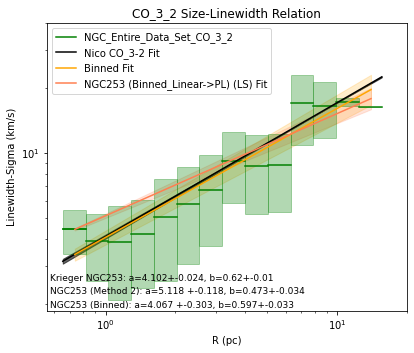

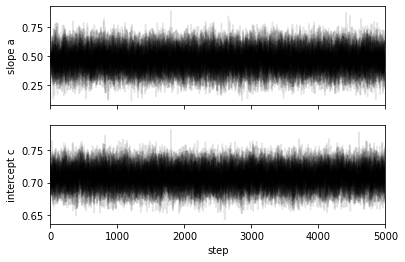

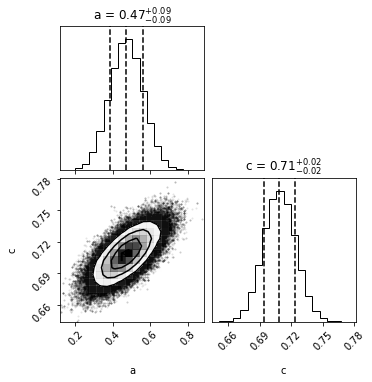

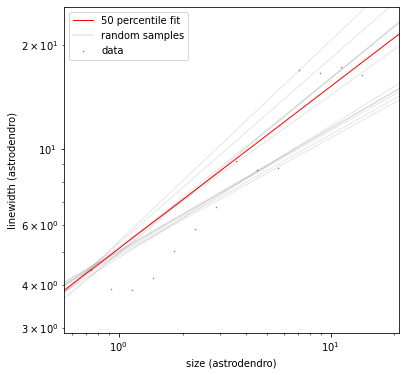

In [22]:
#MCMC fitting


CMZLs = ["HCO+_1_0","HCO+_4_3","HCN_1_0",'HCN_4_3',"CO_3_2"]

Names = np.load("Names_CMZ.npy")
NGCNames = np.load("Names.npy")


#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
NGCNamesMols = [NGCNames[0],NGCNames[9],NGCNames[1],NGCNames[10],NGCNames[3]]
print(NGCNames,NGCNamesMols )





#for i in range(len(RNames)):
fig, axA = pylab.subplots(1, 1, figsize=(5, 4), sharey=True)
pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)


for i in range(4,5):
    er_r=1
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))

    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)

    
    
    
    ######################
    ##rl
    
    #ngc253
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    NBin_s=[]
    Ns_err=[]
    NBin_rad=[]
    Nbins = np.logspace(np.log10(np.nanmin(radsNGC)),np.log10(np.nanmax(radsNGC)),15)
    Nbins=list(Nbins)
    for lmi in range(len(Nbins)-1):
        SBin=[]
        for lmj in range(len(radsNGC)):
            if(radsNGC[lmj]>Nbins[lmi] and radsNGC[lmj]<Nbins[lmi+1]):
                SBin.append(sigsNGC[lmj])
        if(str(np.nanmean(SBin))!=str(np.nan) and str(np.nanmean(SBin))!= str(np.inf)):
            #NBin_s.append(np.nanmean(SBin))
            NBin_s.append(np.nanmean(SBin))
            Ns_err.append(np.nanstd(SBin))
            
        else:
            NBin_s.append(np.nan)
            #Ns_err.append(np.nan)
            Ns_err.append(np.nan)
            
            #NBin_s.append(SBin)
            #Ns_err.append(0)
    NBin_s.append(np.nan)
    Ns_err.append(np.nan)#get right shapes
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axA.plot([Nbins[0],Nbins[1]], [NBin_s[0],NBin_s[0]],c="green",alpha=1,label=("NGC_Entire_Data_Set_"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axA.plot([Nbins[w],Nbins[w+1]], [NBin_s[w],NBin_s[w]],c="green",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axA.add_patch(Rectangle(
            xy=(Nbins[w], NBin_s[w]-Ns_err[w]*er_r) ,width=bw, height=Ns_err[w]*er_r*2,
            linewidth=1, color='green', fill=True,alpha=.3,))
    
    
    if(i==0):
        
        axA.set_ylabel("Linewidth-Sigma (km/s)")
    axA.set_ylabel("Linewidth-Sigma (km/s)")
    
    #Fit to bin centers and median sigma
    Bin_Centers=[]
    def func(R,a,b):
        return a*R**(b)
    for lmi in range(len(Nbins)-1):
        Bin_Centers.append((Nbins[lmi]+Nbins[lmi+1])/2)
        
    #REmove nan in the sigma bins
    
    del NBin_s[len(NBin_s)-1]
    del Ns_err[len(Ns_err)-1]
    
    for lmi in range(len(Nbins)-1):
        if(lmi>len(NBin_s)-1):
            break
        #print(lmi,len(NBin_s),len(Bin_Centers))
        if(str(NBin_s[lmi])==str(np.nan)):
            del NBin_s[lmi]
            del Bin_Centers[lmi]
            del Ns_err[lmi]
        elif((Ns_err[lmi])==0.0):
            Ns_err[lmi] = NBin_s[lmi]#Only one structure in a bin gives a large error
    
    ##fit mcmc to binned data
    
    
    #(popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s))
    x   =  Bin_Centers
    y     = NBin_s

    y_err = Ns_err
    print(y_err,y)
    print(np.shape(y_err),np.shape(y),np.shape(x))
    (popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s,sigma=Ns_err))#Should perfectly replcate krieger
    
    fit = fit_MCMC(log_x     = np.log10(x),
                   log_y     = np.log10(y),
                   log_x_err = [0.05 for x in x],            # half bin width
                   log_y_err = np.log10(y_err),
                   source="NGC253", line=CMZLs[i],
                   xlabel = 'size (astrodendro)',
                   ylabel = 'linewidth (astrodendro)',
                   savepath = 'co32.paperfits_binned'
                  )
    def linear(x,a,c):
        return a*x+c
    #Linear fit, then gives [b, 10^this = a] for use in power law form. This give diff result than regular power law fit fsr
    (coeff, covar) = (curve_fit(linear, np.log10(x), np.log10(y), sigma=np.log10(y_err)))
    print(y,y_err)
    (coeffPow, covarPow) = (curve_fit(func, x, y, sigma=y_err))
    #THESE ARE LESAT SQUARE
    b     = fit.a['ls'][0]
    b_err = fit.a['ls'][1]
    c= fit.c['ls'][0]
    c_err= fit.c['ls'][1]
    s     = fit.y10['ls'][0]
    s_err = fit.y10['ls'][1]
    #THESE MCMC
    b_MCMC     = fit.a['MCMC'][0]
    b_err_MCMC = fit.a['MCMC'][1]
    c_MCMC= fit.c['MCMC'][0]
    c_err_MCMC= fit.c['MCMC'][1]
    s_MCMC     = fit.y10['MCMC'][0]
    s_err_MCMC = fit.y10['MCMC'][1]
    
    print("LS",fit,b,b_err,s,s_err,c,c_err,fit.y10)
    print(b_MCMC,b_err_MCMC,s_MCMC,s_err_MCMC,c_MCMC,c_err_MCMC ,"MCMC")
    print(coeff, covar)
    print(popt,pcov,coeffPow, covarPow)
      
    ###
    
    #Compare to nico

    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .1
    
    
    
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NNicoNM32 = axA.plot(Nxs,NNI32,c='black',label='Nico CO_3-2 Fit')
    NNicoFill32 = axA.fill_between(Nxs,NNIL32,NNIU32,color="black",alpha=.6)
    
    
    axA.plot(Bin_Centers,func(Bin_Centers,popt[0],popt[1]),label="Binned Fit",color="orange")
    axA.fill_between(Bin_Centers,func(Bin_Centers,popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(Bin_Centers,popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),alpha=.2,color="orange")
    axA.plot(Bin_Centers,func(Bin_Centers,NicoCOCoef(s,b),b),label="NGC253 (Binned_Linear->PL) (LS) Fit",color="coral")
    axA.fill_between(Bin_Centers,func(Bin_Centers,NicoCOCoef(s,b)+np.sqrt(NicoAErr(s_err,b,b_err))*er_r,b+np.sqrt(b_err)*er_r),func(Bin_Centers,NicoCOCoef(s,b)-np.sqrt(NicoAErr(s_err,b,b_err))*er_r,b-np.sqrt(b_err)*er_r),alpha=.2,color="coral")
    
    axA.set_xlabel("R (pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    string = ("NGC253 (Binned): a="+str(round(popt[0],3))+" +-" + str(round(np.sqrt(pcov[0][0]),3)) +", b="+str(round(popt[1],3))+"+-" + str(round(np.sqrt(pcov[1][1]),3)) )
    #string2 = ("NGC253 (Binned_MCMC): a="+str(round(NicoCOCoef(s,b),3))+" +-" + str(round(np.sqrt(NicoAErr(s_err,b,b_err)),3)) +", b="+str(round(b,3))+"+-" + str(round(np.sqrt(b_err),3)) )
    string2 = ("NGC253 (Method 2): a="+str(round(NicoCOCoef(s,b),3))+" +-" + str(round(np.sqrt(NicoAErr(s_err,b,b_err)),3)) +", b="+str(round(b,3))+"+-" + str(round(np.sqrt(b_err),3)) )
    
    axA.annotate(s=string,fontsize=9,xy=(0.01,.01),xycoords="axes fraction")
    axA.annotate(s=string2,fontsize=9,xy=(0.01,.06),xycoords="axes fraction")
    NNstA= ("Krieger NGC253: a="+str(round(NicoCOCoef(NNicoCO_32,NNicoCO32),3))+"+-" + str(round(NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32),3)) +", b="+str(round(NNicoCO32,3))+"+-" + str(round((NNicoCOErr32),3)) )
    axA.annotate(s=NNstA,fontsize=9,xy=(0.01,.105),xycoords="axes fraction")
    axA.set_xlim(0,20)
    axA.set_ylim(0,40)

    axA.legend(loc='upper left')

   
    axA.title.set_text((CMZLs[i]+" Size-Linewidth Relation"))
     
    
fig.savefig(bbox_inches='tight',fname="NGC253_CO32_compare_to_Krieger.pdf")


CMZ_CO 3-2_AbsRadii
[1.014807426438291, 1.1521977736729125, 1.2972335074088608, 1.4813552084761028, 1.6560497571000228, 1.644960723007468, 2.3518661616109378, 2.975812682033932, 3.876155293935689, 4.176547921472075, 3.376077329998831, 3.0901100534741706, 1.0214844775115535, 2.5071932763047124] [1.7500690102420988, 1.9471029141907699, 2.1553678157048837, 2.395105998451886, 2.596284915848956, 2.840324518932192, 3.4341006883192433, 4.137271100219199, 6.0874856544692015, 6.670814284326844, 8.399542455042702, 8.97223836593123, 8.736659669916259, 7.13399870915281]
(14,) (14,) (14,)
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
maximum likelihood fitting ...
Bayesian MCMC fitting ...
plotting walkers ...
plotting parameter distributions ...
plotting x - y relation ...



CMZ CO_3_2
    least sq  max like      MCMC
a   0.723447  0.723447  0.723410
a-  0.000007            0.011579
a+  0.000007            0.011514
c   0.245395  0.245395  0.245520
c-  0.0000

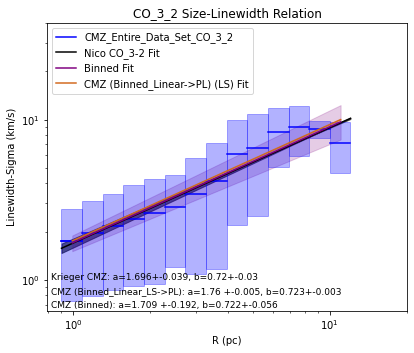

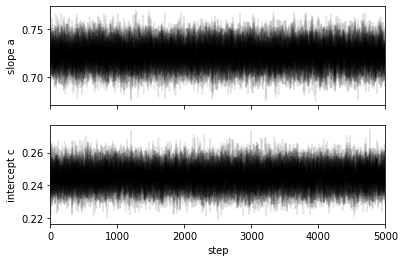

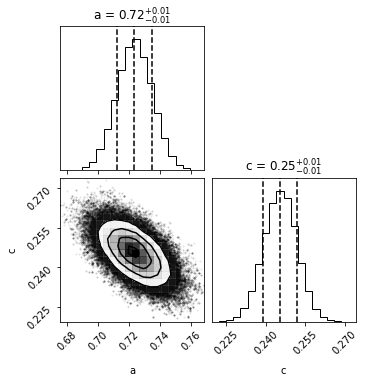

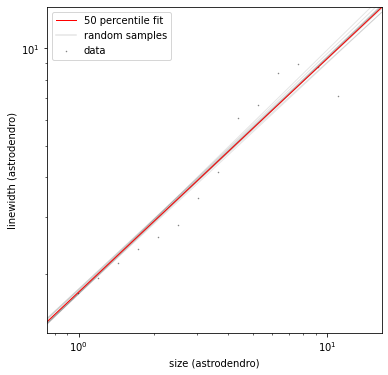

In [19]:
#MCMC fitting
#CMZ


CMZLs = ["HCO+_1_0","HCO+_4_3","HCN_1_0",'HCN_4_3',"CO_3_2"]

Names = np.load("Names_CMZ.npy")



#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]







#for i in range(len(RNames)):
fig, axs = pylab.subplots(1, 1,figsize=(5, 4), sharey=True)
pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)


for i in range(4,5):
    er_r=1
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    
    print(rname)
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    
    
    rads,sigs=np.concatenate((radsBase[0],radsBase[1])), np.concatenate((sigsBase[0],sigsBase[1]))

    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)

    
    axA=axs
    
    ######################
    ##rl
    
    #ngc253
    Nxs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    NBin_s=[]
    Ns_err=[]
    NBin_rad=[]
    Nbins = np.logspace(np.log10(np.nanmin(rads)),np.log10(np.nanmax(rads)),15)
    Nbins=list(Nbins)
    for lmi in range(len(Nbins)-1):
        SBin=[]
        for lmj in range(len(rads)):
            if(rads[lmj]>Nbins[lmi] and rads[lmj]<Nbins[lmi+1]):
                SBin.append(sigs[lmj])
        if(str(np.nanmean(SBin))!=str(np.nan) and str(np.nanmean(SBin))!= str(np.inf)):
            #NBin_s.append(np.nanmean(SBin))
            NBin_s.append(np.nanmean(SBin))
            Ns_err.append(np.nanstd(SBin))
            
        else:
            NBin_s.append(np.nan)
            #Ns_err.append(np.nan)
            Ns_err.append(np.nan)
            
            #NBin_s.append(SBin)
            #Ns_err.append(0)
    NBin_s.append(np.nan)
    Ns_err.append(np.nan)#get right shapes
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axA.plot([Nbins[0],Nbins[1]], [NBin_s[0],NBin_s[0]],c="blue",alpha=1,label=("CMZ_Entire_Data_Set_"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axA.plot([Nbins[w],Nbins[w+1]], [NBin_s[w],NBin_s[w]],c="blue",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axA.add_patch(Rectangle(
            xy=(Nbins[w], NBin_s[w]-Ns_err[w]*er_r) ,width=bw, height=Ns_err[w]*er_r*2,
            linewidth=1, color='blue', fill=True,alpha=.3,))
    
    
    if(i==0):
        
        axA.set_ylabel("Linewidth-Sigma (km/s)")
    axA.set_ylabel("Linewidth-Sigma (km/s)")
    
    #Fit to bin centers and median sigma
    Bin_Centers=[]
    def func(R,a,b):
        return a*R**(b)
    for lmi in range(len(Nbins)-1):
        Bin_Centers.append((Nbins[lmi]+Nbins[lmi+1])/2)
        
    #REmove nan in the sigma bins
    
    del NBin_s[len(NBin_s)-1]
    del Ns_err[len(Ns_err)-1]
    
    for lmi in range(len(Nbins)-1):
        if(lmi>len(NBin_s)-1):
            break
        #print(lmi,len(NBin_s),len(Bin_Centers))
        if(str(NBin_s[lmi])==str(np.nan)):
            del NBin_s[lmi]
            del Bin_Centers[lmi]
            del Ns_err[lmi]
        elif((Ns_err[lmi])==0.0):
            Ns_err[lmi] = NBin_s[lmi]#Only one structure in a bin gives a large error
    
    ##fit mcmc to binned data
    
    
    #(popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s))
    x   =  Bin_Centers
    y     = NBin_s

    y_err = Ns_err
    print(y_err,y)
    print(np.shape(y_err),np.shape(y),np.shape(x))
    (popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s,sigma=Ns_err))#Should perfectly replcate krieger
    
    fit = fit_MCMC(log_x     = np.log10(x),
                   log_y     = np.log10(y),
                   log_x_err = [0.05 for x in x],            # half bin width
                   log_y_err = np.log10(y_err),
                   source="CMZ", line=CMZLs[i],
                   xlabel = 'size (astrodendro)',
                   ylabel = 'linewidth (astrodendro)',
                   savepath = 'co32.paperfits_binned'
                  )
    def linear(x,a,c):
        return a*x+c
    #Linear fit, then gives [b, 10^this = a] for use in power law form. This give diff result than regular power law fit fsr
    (coeff, covar) = (curve_fit(linear, np.log10(x), np.log10(y), sigma=np.log10(y_err)))
    print(y,y_err)
    (coeffPow, covarPow) = (curve_fit(func, x, y, sigma=y_err))
    #THESE ARE LESAT SQUARE
    b     = fit.a['ls'][0]
    b_err = fit.a['ls'][1]
    c= fit.c['ls'][0]
    c_err= fit.c['ls'][1]
    s     = fit.y10['ls'][0]
    s_err = fit.y10['ls'][1]
    #THESE MCMC
    b_MCMC     = fit.a['MCMC'][0]
    b_err_MCMC = fit.a['MCMC'][1]
    c_MCMC= fit.c['MCMC'][0]
    c_err_MCMC= fit.c['MCMC'][1]
    s_MCMC     = fit.y10['MCMC'][0]
    s_err_MCMC = fit.y10['MCMC'][1]
    
    print("LS",fit,b,b_err,s,s_err,c,c_err,fit.y10)
    print(b_MCMC,b_err_MCMC,s_MCMC,s_err_MCMC,c_MCMC,c_err_MCMC ,"MCMC")
    print(coeff, covar)
    print(popt,pcov,coeffPow, covarPow)
      
    ###
    
    #Compare to nico

    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    #CMZ
    NNicoCO32 = .72
    NNicoCOErr32=.03
    NNicoCO_32= 8.9
    NNicoCO_32Err= .2
    #CMZ
    
    
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32)*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NNicoNM32 = axA.plot(Nxs,NNI32,c='black',label='Nico CO_3-2 Fit')
    NNicoFill32 = axA.fill_between(Nxs,NNIL32,NNIU32,color="black",alpha=.6)
    
    
    axA.plot(Bin_Centers,func(Bin_Centers,popt[0],popt[1]),label="Binned Fit",color="purple")
    axA.fill_between(Bin_Centers,func(Bin_Centers,popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(Bin_Centers,popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),alpha=.2,color="purple")
    axA.plot(Bin_Centers,func(Bin_Centers,NicoCOCoef(s,b),b),label="CMZ (Binned_Linear->PL) (LS) Fit",color="chocolate")
    axA.fill_between(Bin_Centers,func(Bin_Centers,NicoCOCoef(s,b)+np.sqrt(NicoAErr(s_err,b,b_err))*er_r,b+np.sqrt(b_err)*er_r),func(Bin_Centers,NicoCOCoef(s,b)-np.sqrt(NicoAErr(s_err,b,b_err))*er_r,b-np.sqrt(b_err)*er_r),alpha=.2,color="chocolate")
    
    axA.set_xlabel("R (pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    string = ("CMZ (Binned): a="+str(round(popt[0],3))+" +-" + str(round(np.sqrt(pcov[0][0]),3)) +", b="+str(round(popt[1],3))+"+-" + str(round(np.sqrt(pcov[1][1]),3)) )
    #string2 = ("NGC253 (Binned_MCMC): a="+str(round(NicoCOCoef(s,b),3))+" +-" + str(round(np.sqrt(NicoAErr(s_err,b,b_err)),3)) +", b="+str(round(b,3))+"+-" + str(round(np.sqrt(b_err),3)) )
    string2 = ("CMZ (Binned_Linear_LS->PL): a="+str(round(NicoCOCoef(s,b),3))+" +-" + str(round(np.sqrt(NicoAErr(s_err,b,b_err)),3)) +", b="+str(round(b,3))+"+-" + str(round(np.sqrt(b_err),3)) )
    
    axA.annotate(s=string,fontsize=9,xy=(0.01,.01),xycoords="axes fraction")
    axA.annotate(s=string2,fontsize=9,xy=(0.01,.06),xycoords="axes fraction")
    NNstA= ("Krieger CMZ: a="+str(round(NicoCOCoef(NNicoCO_32,NNicoCO32),3))+"+-" + str(round(NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32),3)) +", b="+str(round(NNicoCO32,3))+"+-" + str(round((NNicoCOErr32),3)) )
    axA.annotate(s=NNstA,fontsize=9,xy=(0.01,.11),xycoords="axes fraction")
    axA.set_xlim(0,20)
    axA.set_ylim(0,40)

    axA.legend(loc='upper left')

   
    axA.title.set_text((CMZLs[i]+" Size-Linewidth Relation"))
     
    
fig.savefig(bbox_inches='tight',fname="CMZ_CO32_compare_to_Krieger.pdf")
